In [ ]:
import scipy.stats as sp
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt


In [ ]:
uploaded = files.upload()

Saving projeto_teste_para_duas_medias_paises.xlsx to projeto_teste_para_duas_medias_paises (1).xlsx


In [ ]:
df = pd.read_excel('projeto_teste_para_duas_medias_paises.xlsx')

In [ ]:

# Definindo os dados
dados = {
    'Mês': [
        '2024-12-01', '2024-11-01', '2024-10-01', '2024-09-01', '2024-08-01',
        '2024-07-01', '2024-06-01', '2024-05-01', '2024-04-01', '2024-03-01',
        '2024-02-01', '2024-01-01', '2023-12-01', '2023-11-01', '2023-10-01',
        '2023-09-01', '2023-08-01', '2023-07-01', '2023-06-01', '2023-05-01',
        '2023-04-01', '2023-03-01', '2023-02-01', '2023-01-01', '2022-12-01',
        '2022-11-01', '2022-10-01', '2022-09-01', '2022-08-01', '2022-07-01',
        '2022-06-01', '2022-05-01', '2022-04-01', '2022-03-01', '2022-02-01',
        '2022-01-01'
    ],
    'EUA': [
        0.04, -0.05, 0.12, 0.16, 0.08, 0.12, 0.03, 0.17, 0.39, 0.65,
        0.62, 0.54, -0.10, -0.20, -0.04, 0.25, 0.44, 0.19, 0.32, 0.25,
        0.51, 0.33, 0.56, 0.80, -0.31, -0.10, 0.41, 0.22, -0.04, -0.01,
        1.37, 1.10, 0.56, 1.34, 0.91, 0.84
    ],
    'Hungria': [
        0.53, 0.53, 0.09, -0.09, 0.00, 0.72, -0.04, -0.04, 0.68, 0.82,
        0.64, 0.69, -0.32, 0.00, -0.14, 0.37, 0.70, 0.28, 0.28, -0.37,
        0.66, 0.80, 0.81, 2.34, 1.94, 1.82, 2.01, 4.08, 1.80, 2.35,
        1.47, 1.67, 1.58, 1.01, 1.08, 1.39
    ],
    'Polonia': [
        0.00, 0.48, 0.32, 0.11, 0.11, 1.40, 0.11, 0.11, 1.09, 0.22,
        0.27, 0.39, 0.11, 0.72, 0.28, -0.39, 0.00, -0.22, 0.00, 0.00,
        0.73, 1.13, 1.20, 2.52, 0.12, 0.71, 1.80, 1.59, 0.80, 0.49,
        1.51, 1.72, 2.02, 3.30, -0.27, 1.91
    ],
    'Argentina': [
        2.7, 2.4, 2.7, 3.5, 4.2, 4.0, 4.6, 4.3, 8.8, 11.0,
        13.2, 20.6, 25.5, 12.8, 8.3, 12.7, 12.4, 6.3, 6.0, 7.8,
        8.4, 7.7, 6.6, 6.0, 5.1, 4.9, 6.3, 6.2, 7.0, 7.4,
        5.3, 5.1, 6.0, 6.7, 4.7, 3.9
    ],
    'Turquia': [
        1.03, 2.24, 2.88, 2.97, 2.47, 3.23, 1.64, 3.37, 3.18, 3.16,
        4.53, 6.70, 2.93, 3.28, 3.43, 4.75, 9.09, 9.49, 3.92, 0.04,
        2.39, 2.29, 3.15, 6.65, 1.18, 2.88, 3.54, 3.08, 1.46, 2.37,
        4.95, 2.98, 7.25, 5.46, 4.81, 11.10
    ]
}

df= pd.DataFrame(dados)

In [ ]:
df.head()

,Mês,EUA,Hungria,Polonia,Argentina,Turquia
0,2024-12-01,0.04,0.53,0.00,0.04,1.03
1,2024-11-01,-0.05,0.53,0.48,-0.05,2.24
2,2024-10-01,0.12,0.09,0.32,0.12,2.88
3,2024-09-01,0.16,-0.09,0.11,0.16,2.97
4,2024-08-01,0.08,0.00,0.11,0.08,2.47


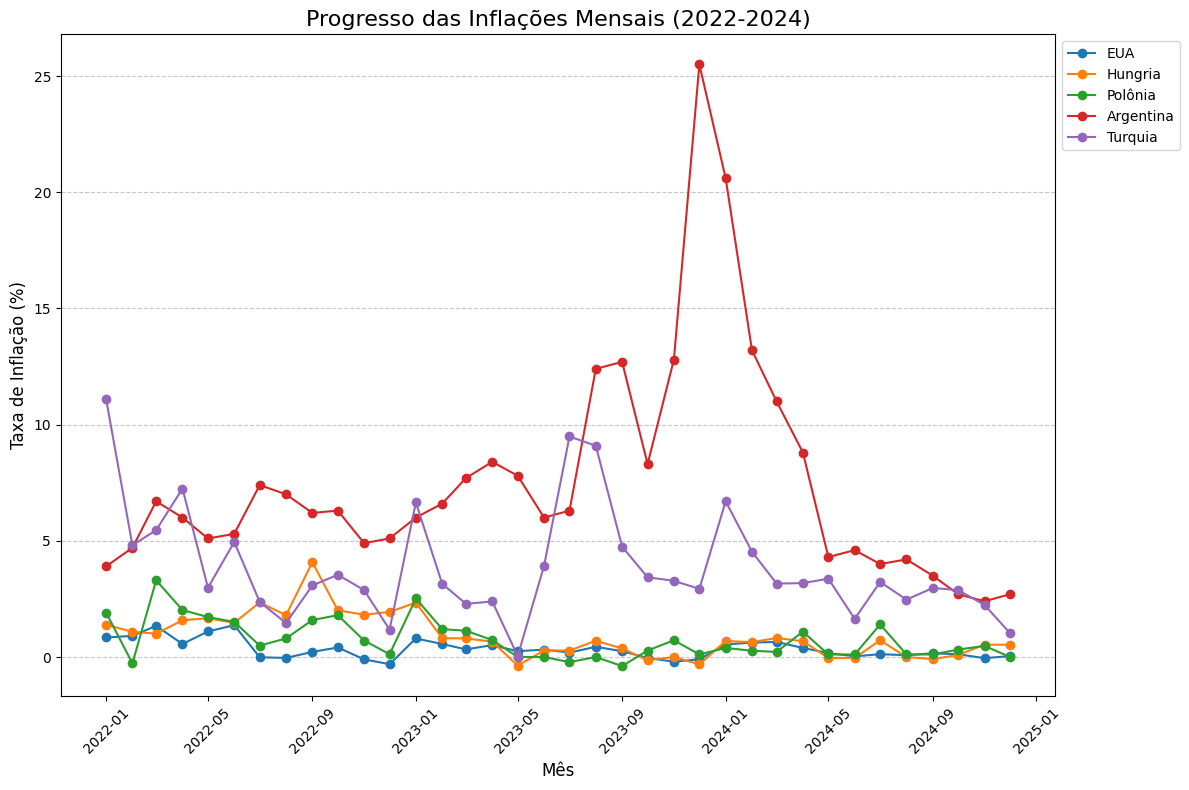

In [ ]:
# Dados de inflação mensal (exemplo simplificado)
dados = {
    'Mês': pd.date_range(start='2022-01-01', end='2024-12-01', freq='MS'),
    'EUA': [0.84, 0.91, 1.34, 0.56, 1.10, 1.37, -0.01, -0.04, 0.22, 0.41, -0.10, -0.31,
            0.80, 0.56, 0.33, 0.51, 0.25, 0.32, 0.19, 0.44, 0.25, -0.04, -0.20, -0.10,
            0.54, 0.62, 0.65, 0.39, 0.17, 0.03, 0.12, 0.08, 0.16, 0.12, -0.05, 0.04],
    'Hungria': [1.39, 1.08, 1.01, 1.58, 1.67, 1.47, 2.35, 1.80, 4.08, 2.01, 1.82, 1.94,
                2.34, 0.81, 0.80, 0.66, -0.37, 0.28, 0.28, 0.70, 0.37, -0.14, 0.00, -0.32,
                0.69, 0.64, 0.82, 0.68, -0.04, -0.04, 0.72, 0.00, -0.09, 0.09, 0.53, 0.53],
    'Polônia': [1.91, -0.27, 3.30, 2.02, 1.72, 1.51, 0.49, 0.80, 1.59, 1.80, 0.71, 0.12,
                2.52, 1.20, 1.13, 0.73, 0.00, 0.00, -0.22, 0.00, -0.39, 0.28, 0.72, 0.11,
                0.39, 0.27, 0.22, 1.09, 0.11, 0.11, 1.40, 0.11, 0.11, 0.32, 0.48, 0.00],
    'Argentina': [3.9, 4.7, 6.7, 6.0, 5.1, 5.3, 7.4, 7.0, 6.2, 6.3, 4.9, 5.1,
                  6.0, 6.6, 7.7, 8.4, 7.8, 6.0, 6.3, 12.4, 12.7, 8.3, 12.8, 25.5,
                  20.6, 13.2, 11.0, 8.8, 4.3, 4.6, 4.0, 4.2, 3.5, 2.7, 2.4, 2.7],
    'Turquia': [11.10, 4.81, 5.46, 7.25, 2.98, 4.95, 2.37, 1.46, 3.08, 3.54, 2.88, 1.18,
                6.65, 3.15, 2.29, 2.39, 0.04, 3.92, 9.49, 9.09, 4.75, 3.43, 3.28, 2.93,
                6.70, 4.53, 3.16, 3.18, 3.37, 1.64, 3.23, 2.47, 2.97, 2.88, 2.24, 1.03]
}

# Criar DataFrame
df = pd.DataFrame(dados)
df.set_index('Mês', inplace=True)

# Criar gráfico de progresso horizontal
plt.figure(figsize=(12, 8))

# Plotar cada país
for i, pais in enumerate(df.columns):
    plt.plot(df.index, df[pais], marker='o', label=pais)

# Ajustes visuais
plt.title('Progresso das Inflações Mensais (2022-2024)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Taxa de Inflação (%)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legenda fora do gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotacionar labels do eixo X para melhor visualização
plt.tight_layout()  # Ajustar layout para evitar cortes

plt.show()

In [ ]:
# Calculando a média das colunas
media = df[['Hungria', 'Argentina', 'EUA', 'Polonia', 'Turquia']].mean()

# Criando um novo DataFrame para armazenar as médias a vista mais facilmente
media_df = pd.DataFrame(media).reset_index()

# Renomeando as colunas para ver melhor
media_df.columns = ['País', 'Média']
print('A media das inflações de cada pais em 3 anos é: ')
print(media_df)

A media das inflações de cada pais em 3 anos é: 
        País     Média
0    Hungria  0.892778
1  Argentina  0.348611
2        EUA  0.346389
3    Polonia  0.733056
4    Turquia  3.885278


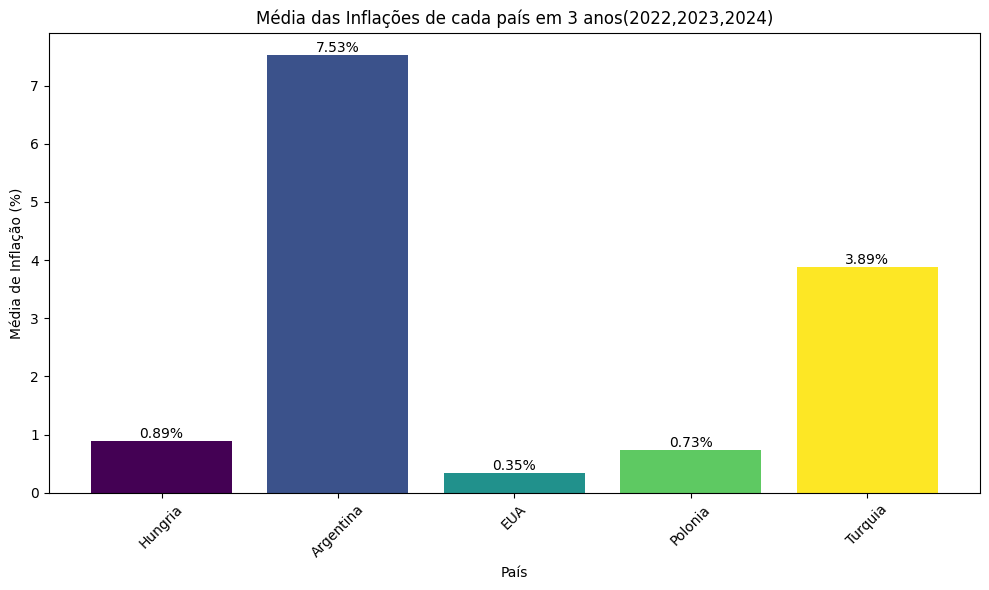

In [ ]:


# Criando um grafico com as médias de inflação
data = {
    'País': ['Hungria', 'Argentina', 'EUA', 'Polonia', 'Turquia'],
    'Média': [0.892778, 7.530556, 0.346389, 0.733056, 3.885278]
}
df = pd.DataFrame(data)

# Criando o gráfico
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(df['País'])))  # Definindo cores distintas

bars = plt.bar(df['País'], df['Média'], color=colors)
plt.title('Média das Inflações de cada país em 3 anos(2022,2023,2024)')
plt.xlabel('País')
plt.ylabel('Média de Inflação (%)')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade

# Adicionando porcentagens acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%',
             ha='center', va='bottom')  # Anota o valor no centro da barra

# Exibindo o gráfico
plt.tight_layout()
plt.show()

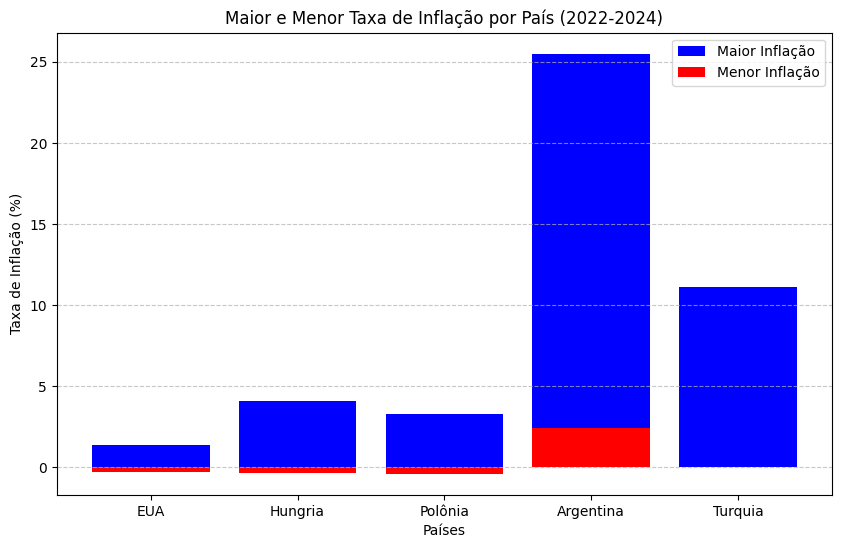

In [ ]:

# Dados
paises = ['EUA', 'Hungria', 'Polônia', 'Argentina', 'Turquia']
maior_inflacao = [1.37, 4.08, 3.30, 25.5, 11.10]
menor_inflacao = [-0.31, -0.37, -0.39, 2.4, 0.04]

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(paises, maior_inflacao, color='blue', label='Maior Inflação')
plt.bar(paises, menor_inflacao, color='red', label='Menor Inflação')
plt.xlabel('Países')
plt.ylabel('Taxa de Inflação (%)')
plt.title('Maior e Menor Taxa de Inflação por País (2022-2024)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Lista de países para comparação
paises = ['Hungria', 'Argentina', 'EUA', 'Polonia', 'Turquia']

# Função para comparar dois países
def comparar_paises(df, pais1, pais2, alfa):
    # mostrar os paises
    print(f'{pais1} e {pais2}')
    # Calcular as médias
    media_pais1 = np.mean(df[pais1])
    media_pais2 = np.mean(df[pais2])
    print(f'Média da inflação de {pais1} de 2022 a 2024: {media_pais1:.2f}')
    print(f'Média da inflação de {pais2} de 2022 a 2024: {media_pais2:.2f}')

    # Teste t
    p_valor = sp.ttest_ind(df[pais1], df[pais2])[1]
    print(f'P-Valor entre {pais1} e {pais2}: {p_valor:.4f}')

    # Comparar p-valor com alfa
    if p_valor < alfa:
        print(f'Com {alfa * 100:.0f}% de significância, a diferença entre {pais1} e {pais2} é significativa.\n')
    else:
        print(f'Com {alfa * 100:.0f}% de significância, a diferença entre {pais1} e {pais2} não é significativa.\n')

# Perguntar o nível de significância
alfa = float(input('Informe o nível de significância em %: ')) / 100


for i in range(len(paises)):
    for j in range(i + 1, len(paises)):
        comparar_paises(df, paises[i], paises[j], alfa)

Informe o nível de significância em %: 5
Hungria e Argentina
Média da inflação de Hungria de 2022 a 2024: 0.89
Média da inflação de Argentina de 2022 a 2024: 7.53
P-Valor entre Hungria e Argentina: 0.0000
Com 5% de significância, a diferença entre Hungria e Argentina é significativa.

Hungria e EUA
Média da inflação de Hungria de 2022 a 2024: 0.89
Média da inflação de EUA de 2022 a 2024: 0.35
P-Valor entre Hungria e EUA: 0.0021
Com 5% de significância, a diferença entre Hungria e EUA é significativa.

Hungria e Polonia
Média da inflação de Hungria de 2022 a 2024: 0.89
Média da inflação de Polonia de 2022 a 2024: 0.73
P-Valor entre Hungria e Polonia: 0.4541
Com 5% de significância, a diferença entre Hungria e Polonia não é significativa.

Hungria e Turquia
Média da inflação de Hungria de 2022 a 2024: 0.89
Média da inflação de Turquia de 2022 a 2024: 3.89
P-Valor entre Hungria e Turquia: 0.0000
Com 5% de significância, a diferença entre Hungria e Turquia é significativa.

Argentina e EUA

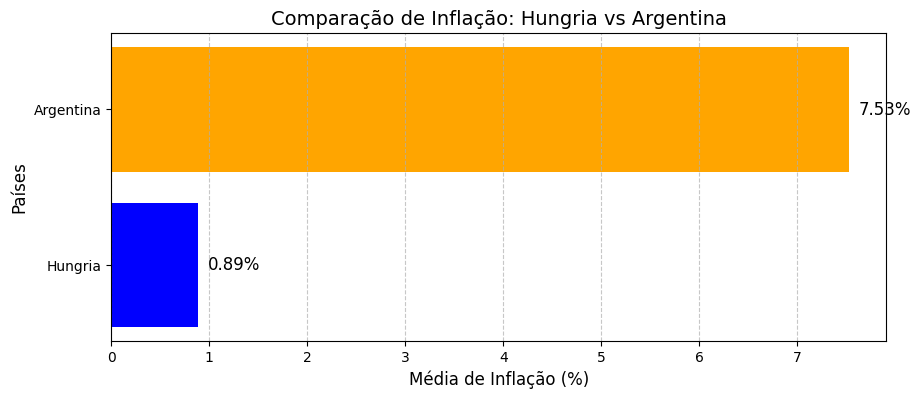

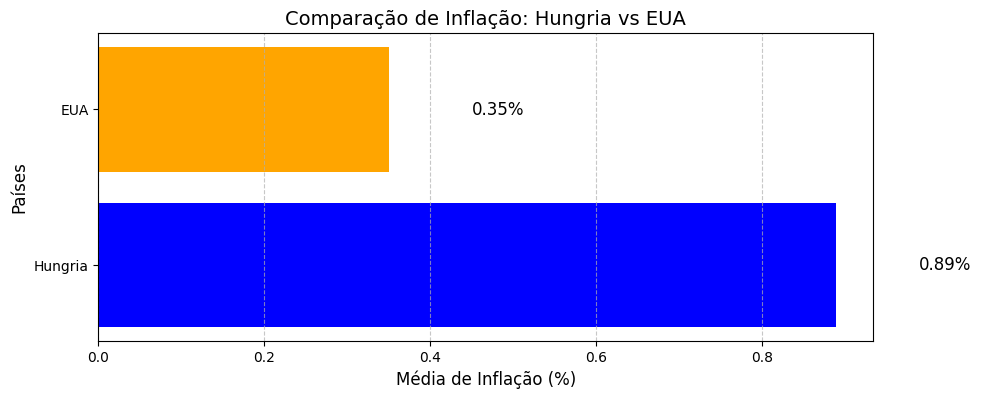

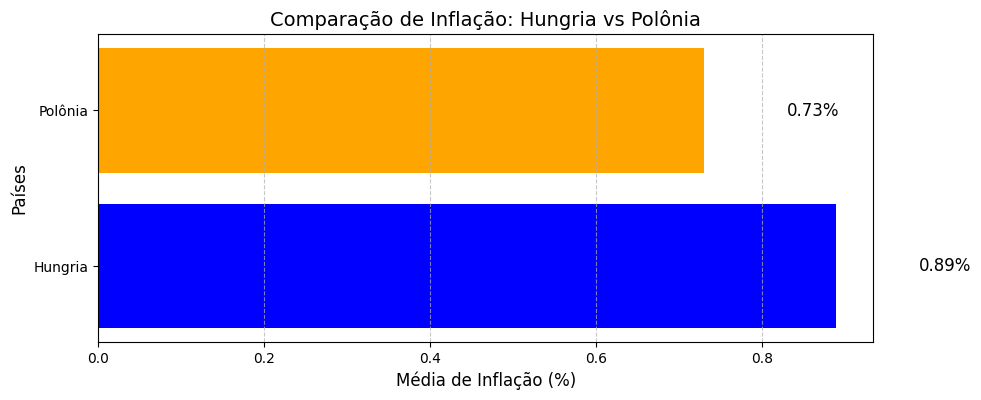

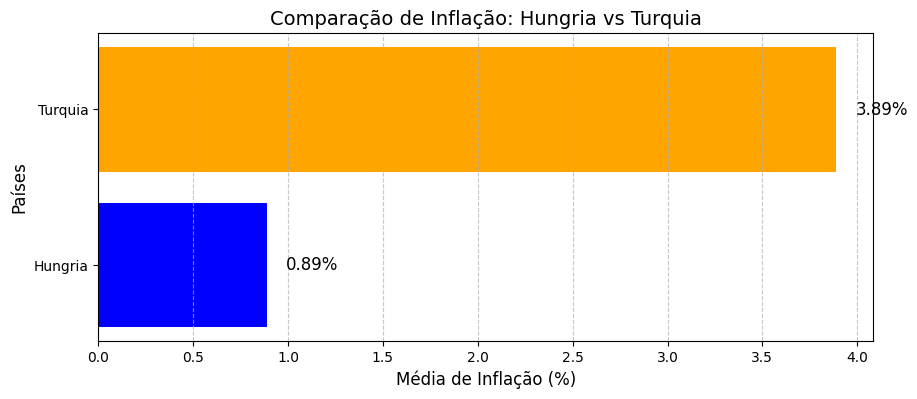

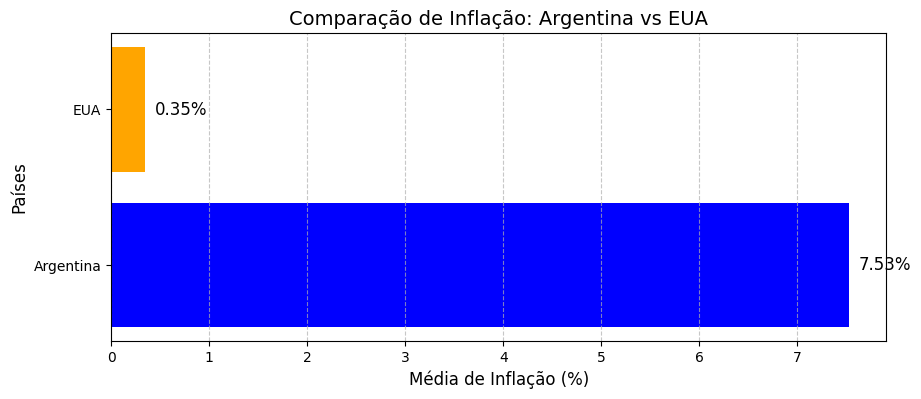

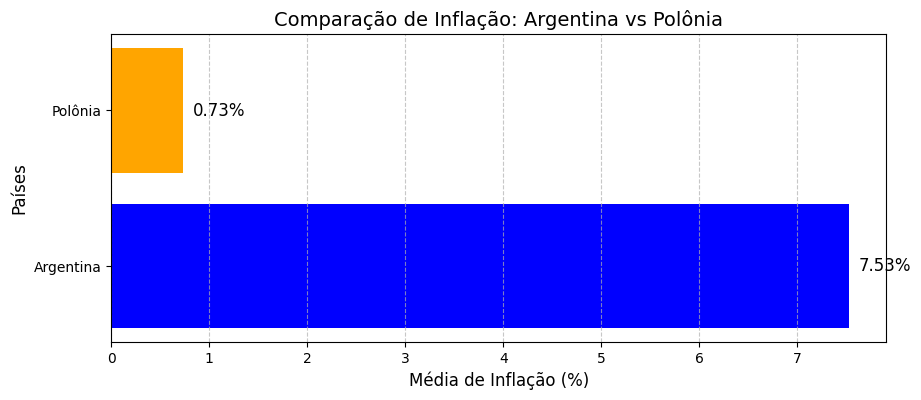

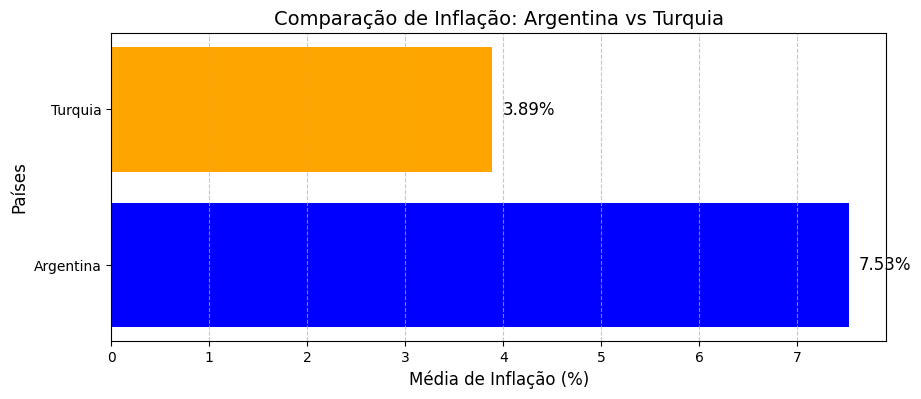

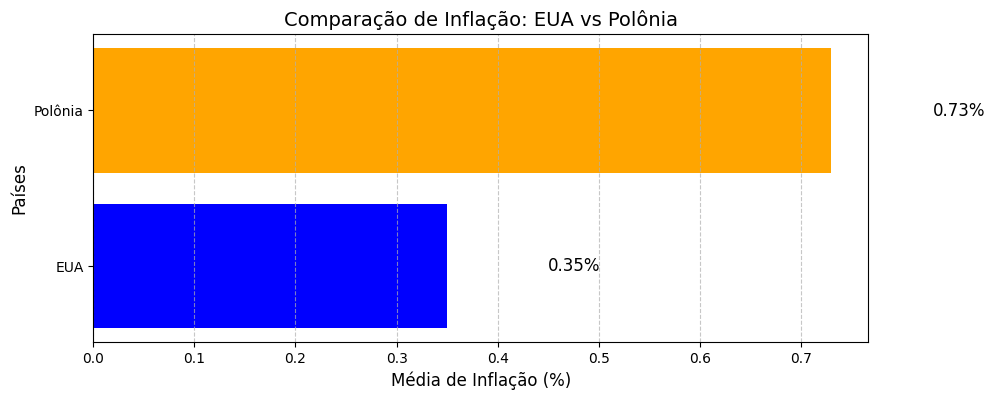

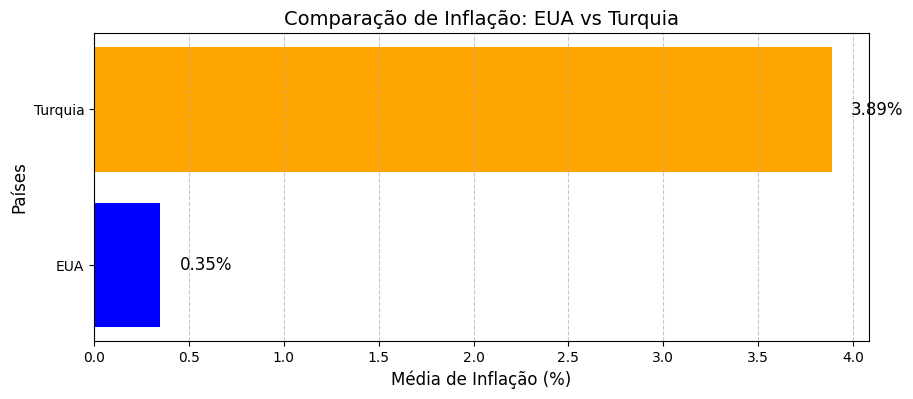

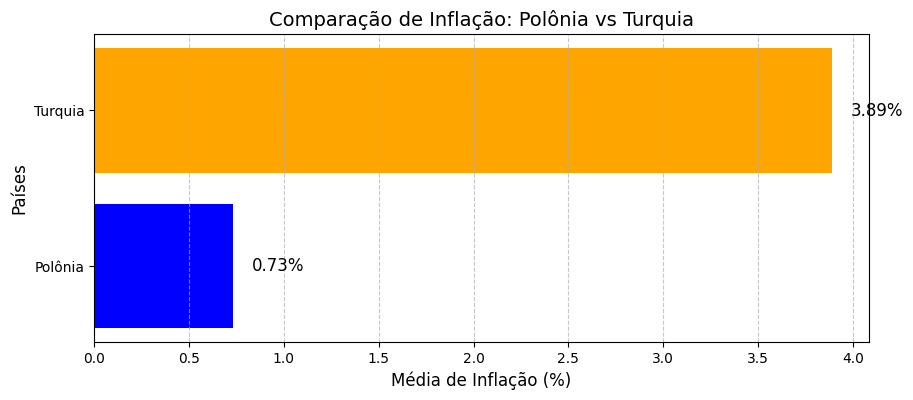

In [ ]:
import matplotlib.pyplot as plt

# Função para criar gráficos de comparação horizontal
def criar_grafico_horizontal(pais1, pais2, media1, media2, p_valor, significancia):
    plt.figure(figsize=(10, 4))
    barras = plt.barh([pais1, pais2], [media1, media2], color=['blue', 'orange'])

    # Adicionar valores nas barras
    for barra in barras:
        largura = barra.get_width()
        plt.text(largura + 0.1, barra.get_y() + barra.get_height() / 2,
                 f'{largura:.2f}%', va='center', fontsize=12)

    # Adicionar título e informações
    plt.title(f'Comparação de Inflação: {pais1} vs {pais2}', fontsize=14)
    plt.xlabel('Média de Inflação (%)', fontsize=12)
    plt.ylabel('Países', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.show()

# Nível de significância
significancia = 0.05

# Comparações
comparacoes = [
    ('Hungria', 'Argentina', 0.89, 7.53, 0.0000),
    ('Hungria', 'EUA', 0.89, 0.35, 0.0021),
    ('Hungria', 'Polônia', 0.89, 0.73, 0.4541),
    ('Hungria', 'Turquia', 0.89, 3.89, 0.0000),
    ('Argentina', 'EUA', 7.53, 0.35, 0.0000),
    ('Argentina', 'Polônia', 7.53, 0.73, 0.0000),
    ('Argentina', 'Turquia', 7.53, 3.89, 0.0001),
    ('EUA', 'Polônia', 0.35, 0.73, 0.0176),
    ('EUA', 'Turquia', 0.35, 3.89, 0.0000),
    ('Polônia', 'Turquia', 0.73, 3.89, 0.0000)
]

# Gerar gráficos para cada comparação
for comparacao in comparacoes:
    criar_grafico_horizontal(comparacao[0], comparacao[1], comparacao[2], comparacao[3], comparacao[4], significancia)

1. Hungria vs. Argentina
Análise: A Argentina apresenta uma inflação média muito mais alta que a Hungria. O p-valor próximo de zero confirma que essa diferença é altamente significativa, refletindo as graves pressões inflacionárias na Argentina.

2. Hungria vs. EUA
Análise: A Hungria tem uma inflação média mais alta que a dos EUA. O p-valor abaixo de 0.05 indica que essa diferença é estatisticamente relevante.

3. Hungria vs. Polônia
Análise: A inflação média da Hungria e da Polônia é bastante parecida. O p-valor alto sugere que a diferença observada pode ser devido a variações aleatórias, e não a um padrão consistente.

4. Hungria vs. Turquia
Análise: A Turquia tem uma inflação média muito mais alta que a Hungria. O p-valor extremamente baixo confirma que essa diferença é altamente significativa, refletindo as graves pressões inflacionárias na Turquia.

5. Argentina vs. EUA
Análise: A Argentina tem uma inflação média muito mais alta que a dos EUA. O p-valor próximo de zero confirma que essa diferença é altamente significativa.

6. Argentina vs. Polônia
Análise: A Argentina apresenta uma inflação média muito mais alta que a Polônia. O p-valor próximo de zero confirma que essa diferença é altamente significativa.

7. Argentina vs. Turquia
Análise: A Argentina tem uma inflação média mais alta que a Turquia. O p-valor muito baixo indica que essa diferença é estatisticamente relevante.

8. EUA vs. Polônia
Análise: A Polônia tem uma inflação média mais alta que a dos EUA. O p-valor abaixo de 0.05 indica que essa diferença é estatisticamente relevante.

9. EUA vs. Turquia
Análise: A Turquia tem uma inflação média muito mais alta que a dos EUA. O p-valor extremamente baixo confirma que essa diferença é altamente significativa.

10. Polônia vs. Turquia
Análise: A Turquia tem uma inflação média muito mais alta que a Polônia. O p-valor próximo de zero confirma que essa diferença é altamente significativa.

Resumo Geral:
Argentina: Apresenta a inflação média mais alta (7.53), com diferenças significativas em relação a todos os outros países.

Turquia: Tem a segunda inflação média mais alta (3.89), com diferenças significativas em relação a todos os países, exceto a Argentina.

Hungria e Polônia: Têm inflações médias moderadas (0.89 e 0.73, respectivamente), com diferenças significativas em relação à Argentina e Turquia, mas não entre si.

EUA: Tem a inflação média mais baixa (0.35), com diferenças significativas em relação a todos os países, exceto a Hungria.

Conclusão:
A Argentina e a Turquia são os países com as maiores pressões inflacionárias, com médias muito superiores às dos outros países.

A Hungria e a Polônia têm inflações moderadas e semelhantes entre si.

Os EUA mantêm a inflação mais baixa, com diferenças significativas em relação a todos os países, exceto a Hungria.

Link dos dados inflacionarios:

trading economics: https://pt.tradingeconomics.com/

inflation: https://www.inflation.eu/en/